### Breast Cancer Classification with simple neural network using logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

### Data collection and processing

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
dataset = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names )

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
dataset['label'] = breast_cancer.target

In [91]:
dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [12]:
# checking the distribution of target col
dataset['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [13]:
dataset.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [14]:
X = dataset.drop(columns='label', axis=1)
Y = dataset['label']

In [97]:
print(X.loc[546])

mean radius                 10.320000
mean texture                16.350000
mean perimeter              65.310000
mean area                  324.900000
mean smoothness              0.094340
mean compactness             0.049940
mean concavity               0.010120
mean concave points          0.005495
mean symmetry                0.188500
mean fractal dimension       0.062010
radius error                 0.210400
texture error                0.967000
perimeter error              1.356000
area error                  12.970000
smoothness error             0.007086
compactness error            0.007247
concavity error              0.010120
concave points error         0.005495
symmetry error               0.015600
fractal dimension error      0.002606
worst radius                11.250000
worst texture               21.770000
worst perimeter             71.120000
worst area                 384.900000
worst smoothness             0.128500
worst compactness            0.088420
worst concav

In [56]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

### Splitting data for training and test

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state= 2)

In [20]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(455, 30) (114, 30) (455,) (114,)


#### Standardize the data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
x_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.fit_transform(X_test)

In [35]:
x_train_std

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

### Now, building a neural network for classifying cancer

In [22]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(30,)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [36]:
# Train the model
history = model.fit(x_train_std, Y_train, validation_split=0.1, epochs=10) 

Epoch 1/10
13/13 [==============================] - 1s 43ms/step - loss: 1.0292 - accuracy: 0.3007 - val_loss: 0.6849 - val_accuracy: 0.5217
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6014 - accuracy: 0.6308 - val_loss: 0.3764 - val_accuracy: 0.7826
Epoch 3/10
13/13 [==============================] - 0s 12ms/step - loss: 0.4048 - accuracy: 0.7873 - val_loss: 0.2695 - val_accuracy: 0.8913
Epoch 4/10
13/13 [==============================] - 0s 11ms/step - loss: 0.3125 - accuracy: 0.8680 - val_loss: 0.2175 - val_accuracy: 0.9348
Epoch 5/10
13/13 [==============================] - 0s 15ms/step - loss: 0.2500 - accuracy: 0.9169 - val_loss: 0.1828 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 21ms/step - loss: 0.2073 - accuracy: 0.9413 - val_loss: 0.1571 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 16ms/step - loss: 0.1749 - accuracy: 0.9535 - val_loss: 0.1393 - val_accuracy: 0.9783
Epoch 8/10
13

### Visualizing accuracy and loss

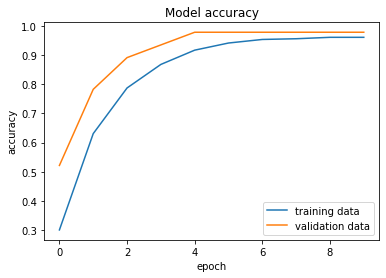

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='lower right')

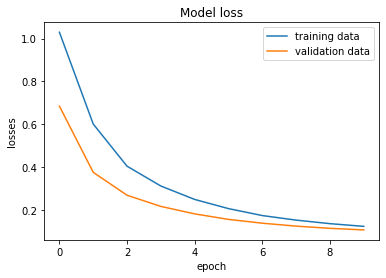

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('losses')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='upper right')

### Accuracy of the model on test

In [42]:
loss, accuracy = model.evaluate(x_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.1272 - accuracy: 0.9649
0.9649122953414917


In [43]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[-0.08700339 -1.47192915 -0.10537391 -0.21479674  2.05627941 -0.18759821
  0.04345969  0.3431473   0.48693221  0.20971492  0.41483725  2.38110688
  0.53816721  0.01895993  0.95128447  0.31678369  0.28189043  2.21465008
 -0.39276605  0.44485916 -0.3863489  -1.69650664 -0.42190004 -0.44557481
  0.23041821 -0.75521902 -0.60192371 -0.26629174 -1.09776353 -0.65597459]


In [44]:
y_pred = model.predict(x_test_std)

4/4 [==============================] - 0s 3ms/step


In [45]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.26260063 0.5429319 ]


In [46]:
print(y_pred)

[[2.62600631e-01 5.42931914e-01]
 [3.33732843e-01 6.82229280e-01]
 [3.17447782e-02 9.79067028e-01]
 [5.53486526e-01 3.97031399e-04]
 [2.57513583e-01 4.99777853e-01]
 [5.14045179e-01 2.36942787e-02]
 [1.57340884e-01 8.34736109e-01]
 [2.49212906e-02 8.88110697e-01]
 [8.17847922e-02 9.19151485e-01]
 [8.41503143e-02 8.12665582e-01]
 [4.43142027e-01 6.02938235e-01]
 [1.17552906e-01 8.36320817e-01]
 [1.48126438e-01 8.37952137e-01]
 [2.04443216e-01 8.47917318e-01]
 [5.55533543e-02 9.70468938e-01]
 [4.51853514e-01 2.61262417e-01]
 [3.10257655e-02 9.48885560e-01]
 [3.39023508e-02 9.34461713e-01]
 [7.62244016e-02 9.36197639e-01]
 [4.82147694e-01 4.96046916e-02]
 [4.12516743e-02 3.82984400e-01]
 [1.70489382e-02 8.74521017e-01]
 [9.89449993e-02 9.44135427e-01]
 [1.90086942e-02 8.80101979e-01]
 [5.98597117e-02 6.81484520e-01]
 [5.59739590e-01 1.10980473e-01]
 [9.72875431e-02 7.83680677e-01]
 [1.34509936e-01 4.62927073e-01]
 [5.74670732e-01 2.08179012e-01]
 [5.70737839e-01 1.37701511e-01]
 [8.815602

#### use label 0 or 1 for predicted values

In [49]:
# For understanding the function of argmax
my_list = [0.32, 0.44]
max_value = np.argmax(my_list)
print(max_value)
# It will return the index of maximum value in list or array

1


In [50]:
# converting the prediction prob to class lable 0 or 1
y_pred_labels = [np.argmax(i) for i in y_pred]

In [51]:
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


### Building the predictive system

In [112]:
input_data = (10.32,16.35,65.92,324.0,0.0943,0.04994,0.01012,0.0054,0.1885,0.0620,
              0.2104,0.9670,1.3560,12.970000,0.007086,0.007247, 0.010120
              , 0.005495,11.250000,6.015600,43.002606,30.37,59.16,268.6,35.08996,43.06444,43.0000,33.0000,34.2871,43.07039)

# change the input data to a numpy array

input_data_array = np.asarray(input_data)

print(input_data_array)

[1.0320000e+01 1.6350000e+01 6.5920000e+01 3.2400000e+02 9.4300000e-02
 4.9940000e-02 1.0120000e-02 5.4000000e-03 1.8850000e-01 6.2000000e-02
 2.1040000e-01 9.6700000e-01 1.3560000e+00 1.2970000e+01 7.0860000e-03
 7.2470000e-03 1.0120000e-02 5.4950000e-03 1.1250000e+01 6.0156000e+00
 4.3002606e+01 3.0370000e+01 5.9160000e+01 2.6860000e+02 3.5089960e+01
 4.3064440e+01 4.3000000e+01 3.3000000e+01 3.4287100e+01 4.3070390e+01]


In [113]:
print(X.loc[546])

mean radius                 10.320000
mean texture                16.350000
mean perimeter              65.310000
mean area                  324.900000
mean smoothness              0.094340
mean compactness             0.049940
mean concavity               0.010120
mean concave points          0.005495
mean symmetry                0.188500
mean fractal dimension       0.062010
radius error                 0.210400
texture error                0.967000
perimeter error              1.356000
area error                  12.970000
smoothness error             0.007086
compactness error            0.007247
concavity error              0.010120
concave points error         0.005495
symmetry error               0.015600
fractal dimension error      0.002606
worst radius                11.250000
worst texture               21.770000
worst perimeter             71.120000
worst area                 384.900000
worst smoothness             0.128500
worst compactness            0.088420
worst concav

In [114]:
flatten_array = input_data_array.flatten()
#print(flatten_array)

# reshape array to shape (1 , 1)

reshaped_array = flatten_array.reshape((-1,1))
print(reshaped_array.shape)

(30, 1)


In [115]:
# Standardaizing the input data
input_std = scaler.fit_transform(reshaped_array)

prediction = model.predict(input_std)

print(prediction)

prediction_label = [np.argmax(prediction)]

print(prediction_label)

if (prediction_label[0] == 0):
    print("The tumor is malignant")
else:
    print("The tumor is benign")

1/1 [==============================] - 0s 32ms/step
[[0.5587383  0.39347315]]
[0]
The tumor is malignant
